In [29]:
import pandas as pd
import numpy as np

import scipy.stats as stats  # to plot QQ Plot

import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['Strength']),df['Strength'],test_size=0.2)

In [10]:
minmax = MinMaxScaler()

In [13]:
xtrain_age = minmax.fit_transform(xtrain)
xtest_age = minmax.fit_transform(xtest)

In [38]:
xtrain  = pd.DataFrame(xtrain_age,columns=xtrain.columns)
xtest  = pd.DataFrame(xtest_age,columns=xtest.columns)

In [18]:
xtrain

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.654338,0.270173,0.000000,0.288339,0.375776,0.148547,0.832163,0.151099
1,0.252283,0.000000,0.501749,0.299521,0.270186,0.601163,0.776719,0.271978
2,0.737443,0.295771,0.000000,0.253195,0.512422,0.148547,0.735324,0.151099
3,0.399543,0.000000,0.000000,0.552716,0.000000,0.485465,0.657301,0.074176
4,0.863014,0.000000,0.000000,0.560703,0.000000,0.392442,0.318615,0.074176
...,...,...,...,...,...,...,...,...
819,0.594977,0.525876,0.000000,0.344249,0.360248,0.417733,0.405921,0.016484
820,0.474886,0.000000,0.000000,0.560703,0.000000,0.491279,0.642248,0.074176
821,1.000000,0.000000,0.000000,0.408946,0.000000,0.941860,0.047667,0.035714
822,0.146347,0.000000,0.816092,0.436901,0.139752,0.748837,0.466884,0.074176


In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
ypred =lr.predict(xtest)

In [28]:
r2_score(ytest,ypred)

0.6324684158474223

In [30]:
# applying Box-Cox Transform 
pt = PowerTransformer(method='box-cox')

xtrain_trans = pt.fit_transform(xtrain+0.000001)
xtest_trans = pt.fit_transform(xtest+0.000001)

In [31]:
lr.fit(xtrain_trans,ytrain)

LinearRegression()

In [33]:
ypred=lr.predict(xtest_trans)

In [35]:
r2_score(ytest,ypred)

0.7899269457580389

In [36]:
np.mean(cross_val_score(lr,xtrain_trans,ytrain,scoring='r2'))

np.float64(0.778343604691049)

In [39]:
xtrain_trans  = pd.DataFrame(xtrain_trans,columns=xtrain.columns)
xtest_trans  = pd.DataFrame(xtest_trans,columns=xtest.columns)

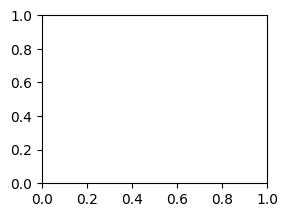

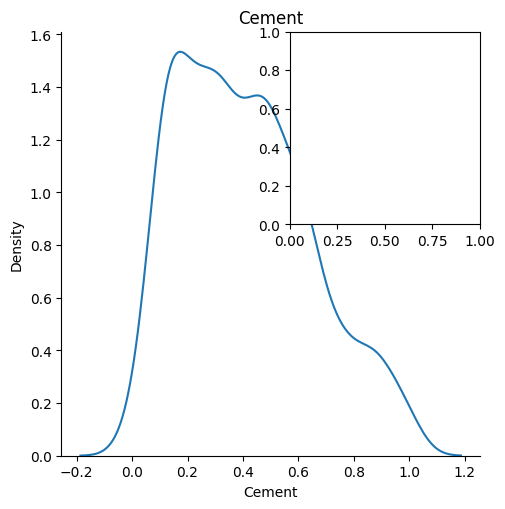

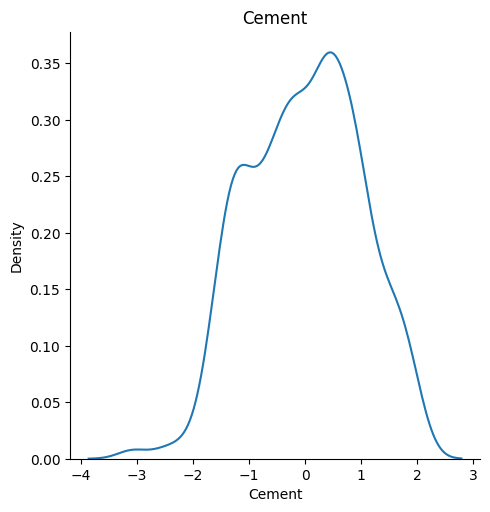

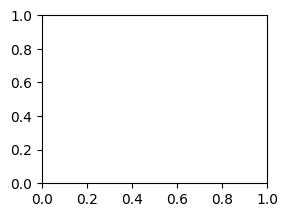

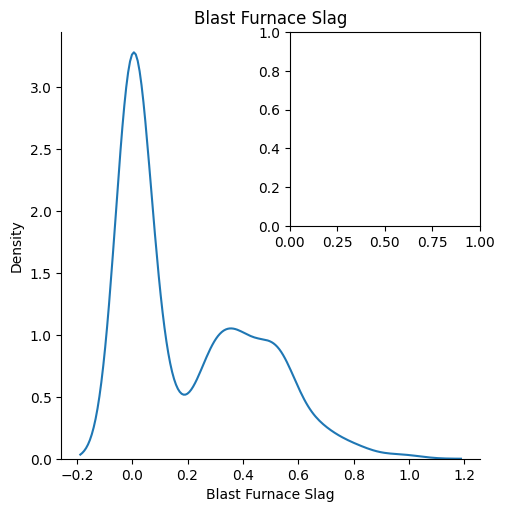

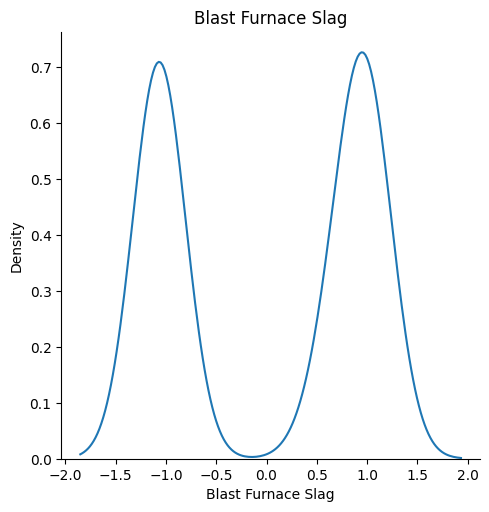

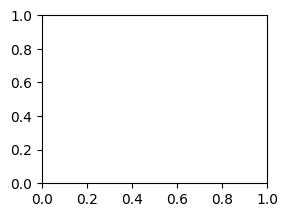

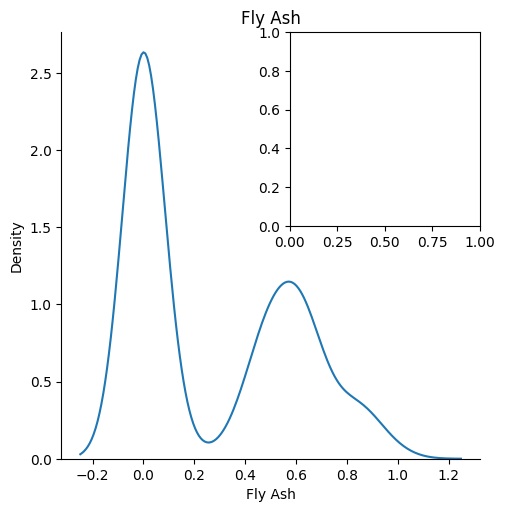

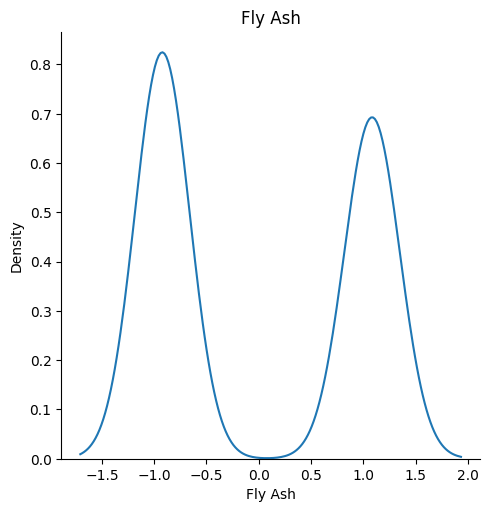

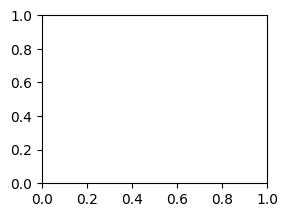

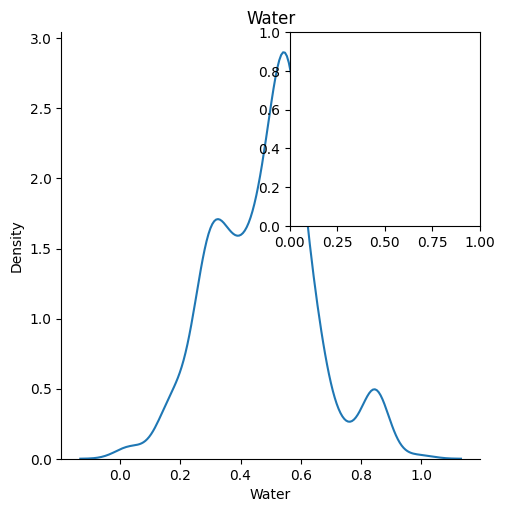

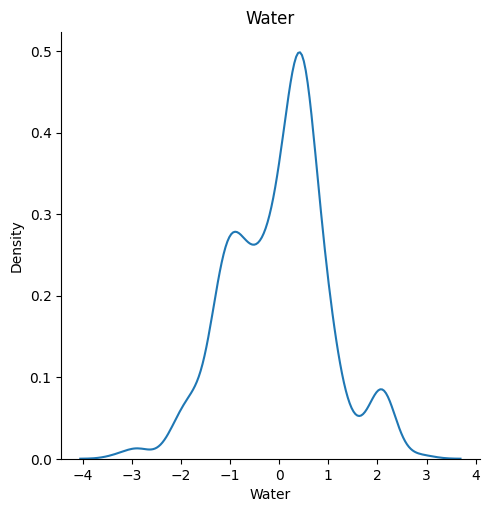

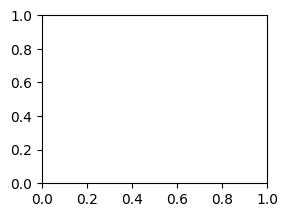

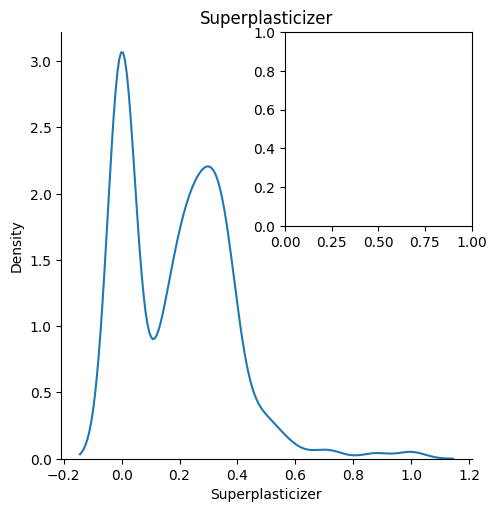

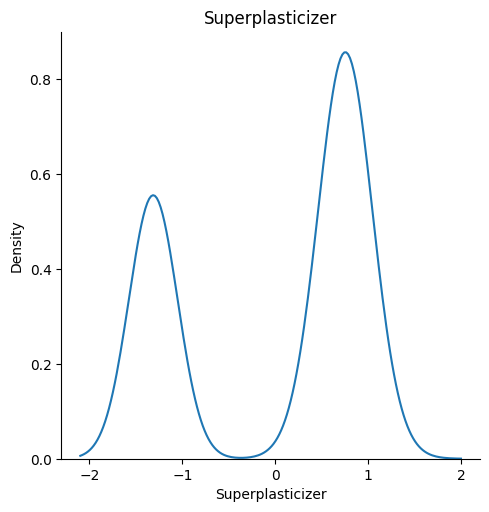

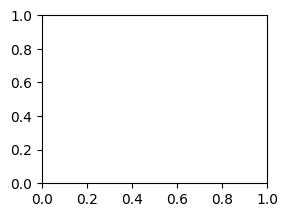

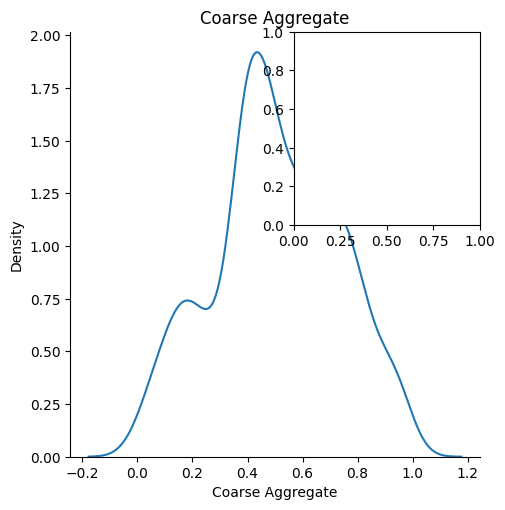

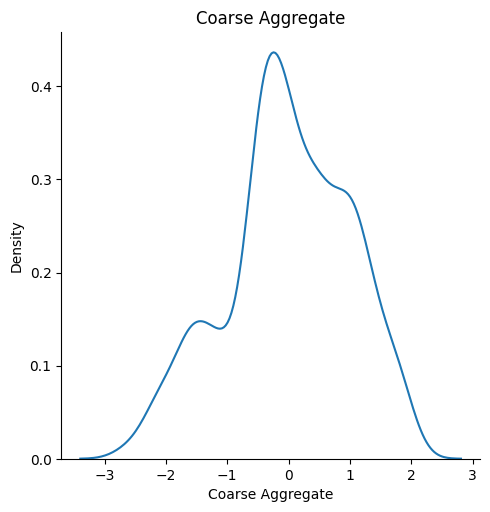

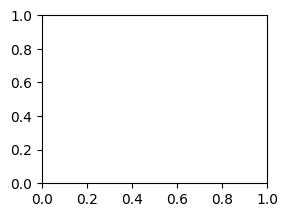

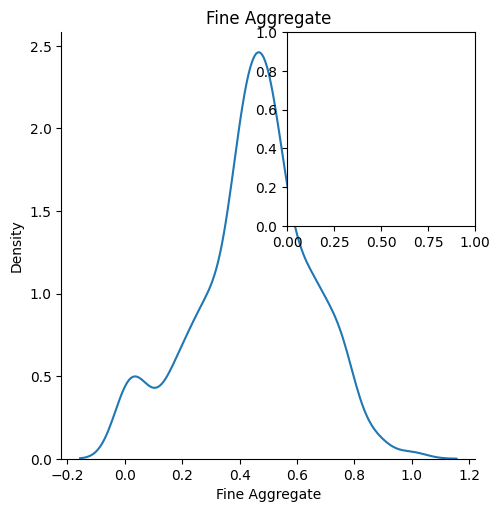

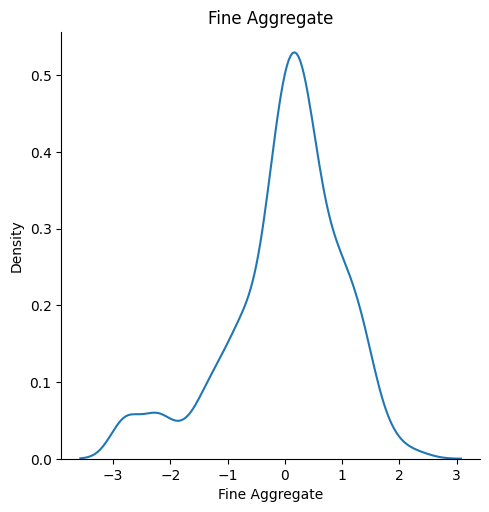

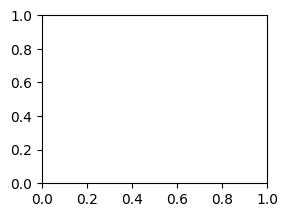

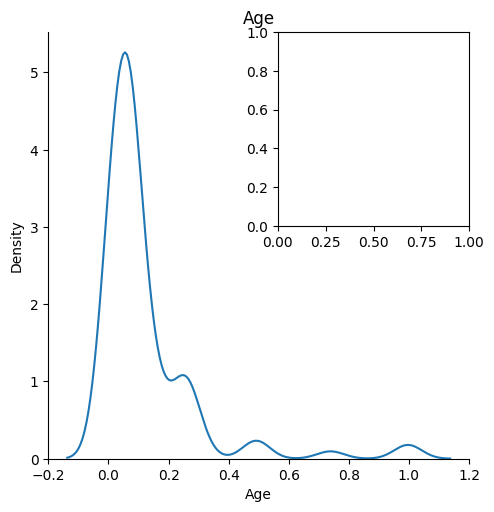

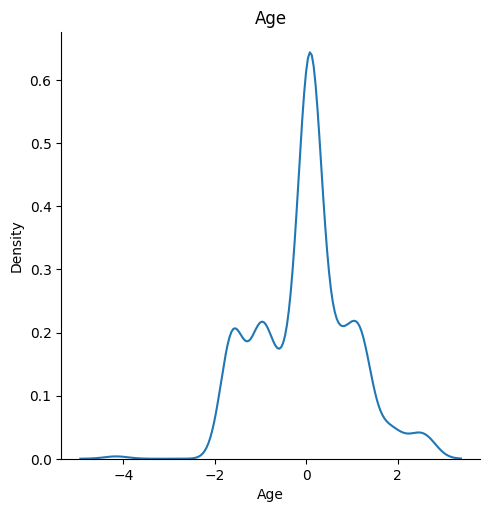

In [45]:
for col in xtrain.columns :
    plt.Figure(figsize=(14,4))
    plt.subplot(221)
    sns.displot(xtrain[col], kind='kde')
    plt.title(col)
    
    plt.subplot(222)
    sns.displot(xtrain_trans[col],kind='kde')
    plt.title(col)
    plt.show()

In [49]:
pt1 = PowerTransformer()

xtrain_trans2 = pt1.fit_transform(xtrain)
xtest_trans2 = pt1.fit_transform(xtest)
lr4 = LinearRegression()
lr4.fit(xtrain_trans2,ytrain)
ypred2=lr.predict(xtest_trans2)


In [50]:
r2_score(ytest,ypred2)

0.800971557090757

In [51]:
np.mean(cross_val_score(lr4,xtrain_trans2,ytrain,scoring='r2'))

np.float64(0.7979408834710655)